# Homework 7: Pandas and Seaborn(27 pts)

name: Leo Huynh

email: qlhuynh@umich.edu

This homework assignment took me 5 hours in total to complete. (Please help us to gauge the difficulty of the assignment.)

## Collaboration Disclosure

In the cell below, please list *everyone* with whom you discussed any of the homework problems, excluding only the GSIs and the course instructor. 

If you did not discuss the homework with anyone else, write __"I did not discuss this homework with anyone."__

Even if you discuss questions with other, the code you submit must be only yours. All work is checked with the [MOSS plagiarism detector](https://theory.stanford.edu/~aiken/moss/).

---

## Submission Instructions
Your homework solutions should be written entirely in this Jupyter notebook file. Once it contains your solutions, you should submit this notebook through Canvas. 


Before submitting, please make sure to __Cells->Run All__ executes without errors; errors in your code translate directly to point deductions. 
In general, you don't need to do explicitly raise errors (e.g. with the ```raise``` function) if we don't ask you to in the problem statement.
However, even in cases where we ask you to check for errors, your submission should not contain any examples of your functions actually raising those errors.

Note that many parts of this homework where you are expected to type in code will have ```NotImplementedError()``` as a placeholder. You need to delete this function and replace it with your own code.

## Homework tips 

1. **Start early!** If you run into trouble installing things or importing packages, it’s
best to find those problems well in advance, not the night before your assignment is
due when we cannot help you!

2. **Make sure you back up your work!** At a minimum, do your work in a Dropbox
folder. Better yet, use git, which is well worth your time and effort to learn.

3. **Be careful to follow directions!** Remember that Python is case sensitive. If
you are ask you to define a function called my_function and you define a function
called My_Function, you will not receive full credit. You may want to copy-paste
the function names below to make sure that the functions in your notebook match.

## Error checking

You do not need to do error checking (raising errors, etc.) in your code unless we explicitly ask you to so in a problem.


## Nbgrader

We will be using `nbgrader` to grade your jupyter notebook. You will notice some `read-only` cells in the assignment that contain `assert` statements. These are tests that your code must pass for your solution to be correct. If any of the tests fail, you will get an python error and not get points for that question. 

**Note:** The tests shown not are not comprehensive; additional tests will be used at grading time. You are encouraged to read the problem carefully and verify your code covers all possible cases.

**Be careful:** If a jupyter notebook cell takes longer than `60s` to run, the autograder will not grade it and you will receive zero credit for that question.

# Question 1 (18 pts) 
We will look into the NYC flights dataset using Pandas!

## Question 1.1 (2 pts)
Load the dataset from flights.csv file given with this file into a dataframe variable named `df`

In [1]:
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv("flights.csv")
df.head(10)
# YOUR CODE HERE
# raise NotImplementedError()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,1.357034e+09
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,1.357034e+09
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,1.357034e+09
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,1.357034e+09
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,1.357038e+09
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719.0,5.0,58.0,1.357034e+09
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065.0,6.0,0.0,1.357038e+09
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229.0,6.0,0.0,1.357038e+09
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944.0,6.0,0.0,1.357038e+09
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733.0,6.0,0.0,1.357038e+09


In [3]:
assert df is not None
assert isinstance(df, pd.core.frame.DataFrame)

## Question 1.2 (2 pts)
Get the total count of flights for each month and display the top three months with the highest count.

In [4]:
monthly_count = df['month'].value_counts()[:3]
# YOUR CODE HERE
# raise NotImplementedError()
monthly_count

month
7     29425
8     29327
10    28889
Name: count, dtype: int64

In [5]:
assert all(monthly_count == pd.Series([29425, 29327, 28889], index = [7, 8, 10]))

## Question 1.3 (2 pts)
First get a new dataframe with the three columns of interest 'carrier', 'month' and 'dep_delay'. Then compute the average dep_delay for each carrier and for each month. Rank the departure delays/month and filter the 1st rank carrier for each month (carrier with the lowest dep_delay for the month will get the 1st rank). Show the results in ascending order of the month

Hint: Some of the functions that can help are rank(), unstack(), stack(). 

In [6]:
avg_delay = df[['carrier', 'month','dep_delay']].groupby(['month','carrier']).mean()
# YOUR CODE HERE
avg_delay['dep_delay'].groupby(level = 0).rank() == 1
avg_delay[avg_delay['dep_delay'].groupby(level = 0).rank() == 1]
# raise NotImplementedError()

,,dep_delay
month,carrier,
1,VX,1.063492
2,AS,0.722222
3,HA,1.161290
4,HA,-2.100000
5,HA,-1.451613
6,HA,1.466667
7,HA,-1.709677
8,HA,1.677419
9,HA,-5.440000


In [7]:
# Hidden test here

## Question 1.4 (2 pts)
Find the 5 top destinations in this dataset (most number of flights to). Filter only those flights to these top 5 destinations and then show the distribution of carriers on this filtered data.

In [8]:
top_dest = np.array(df['dest'].value_counts()[:5].index)
top_dest_df = df.groupby(df['dest']).filter(lambda x: x.name in list(top_dest))
top_carrier_count = top_dest_df['carrier'].value_counts()
top_carrier_count
# YOUR CODE HERE
# raise NotImplementedError()

carrier
UA    19469
DL    17707
B6    13448
AA    11826
MQ     4598
US     4283
VX     2580
FL     2337
9E     2029
EV     1925
WN       59
OO        1
Name: count, dtype: int64

In [9]:
import numpy as np
assert np.all(top_dest == np.array(['ORD', 'ATL', 'LAX', 'BOS', 'MCO']))

## Question 1.5 (2 pts)
Get the total count of cancelled flights in this dataset. We'll say that a cancelled flight has dep_time missing.

In [10]:
cancelled_flight_count = len(df[pd.isna(df['dep_time'])])
cancelled_flight_count
# YOUR CODE HERE
# raise NotImplementedError()

8255

In [11]:
assert cancelled_flight_count == 8255

## Question 1.6 (2 pts)
Count all the destinations that have a letter 'K' anywhere in the name code.

In [12]:
dest_with_k = len(df.groupby(df['dest']).filter(lambda x: 'K' in x.name))
dest_with_k
# YOUR CODE HERE
# raise NotImplementedError()

4589

In [13]:
assert dest_with_k == 4589

## Question 1.7 (2 pts)
Create a new column called speed that computes the speed as distance/air_time

In [14]:
# YOUR CODE HERE
df['speed']= df['distance']/df['air_time']
# raise NotImplementedError()

In [15]:
assert type(df['speed']) == pd.Series 
assert abs(df['speed'][0] - 6.1674) < 1

## Question 1.8 (4 pts)
Segment the dep_time 24 hours into 
* night from 12 midnight to 5 am
* morning from 5:01 am to 12 noon
* afternoon from 12.01 noon to 5 pm
* evening from 5.01 pm to 12 am

And then run a query to find the total flights in each segment and save that value in the given variable.


In [16]:
import numpy as np
def time_of_day(x):
    if x > 0 and x <= 500: 
        return 'night'
    elif x > 500 and x <= 1200:
        return 'morning'
    elif x > 1200 and x <= 1700:
        return 'afternoon'
    elif x > 1700: return 'evening'
    else: return None

# df['time_of_day'][-pd.isna(df['dep_time'])] = np.apply_along_axis(time_of_day, axis = 0, arr = df['dep_time'][-pd.isna(df['dep_time'])].values.reshape(1,328521))
df['time_of_day'] = np.apply_along_axis(time_of_day, axis = 0, arr = df['dep_time'].values.reshape(1,336776))

# np.apply_along_axis(time_of_day, axis = 0, arr = df['dep_time'][-pd.isna(df['dep_time'])].values.reshape(1,328521))
# df['dep_time'][-pd.isna(df['dep_time'])]
parts_of_day_count = df['time_of_day'].value_counts()
parts_of_day_count

# YOUR CODE HERE
# raise NotImplementedError()

time_of_day
morning    129939
afterno     98733
evening     98362
None         8255
night        1487
Name: count, dtype: int64

In [17]:
assert parts_of_day_count['morning'] == 129939
assert parts_of_day_count['evening'] == 98362

# Question 2 (9 pts) 
In this problem, we will do some exploratory data analytics (EDA) by using some of the visualization libraries in Python.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
flights = pd.read_csv("flights.csv.gz")
airports = pd.read_csv("airports.csv")
flights.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


## Question 2.1 (3 pts)

Line charts are ideal to show a trend line. Draw a line chart to show monthly frequency count of flights as a trend line for the year 2013. Be sure to choose the correct data to display on the x-axis and y-axis.

Text(0.5, 1.0, 'Monthly breakdown')

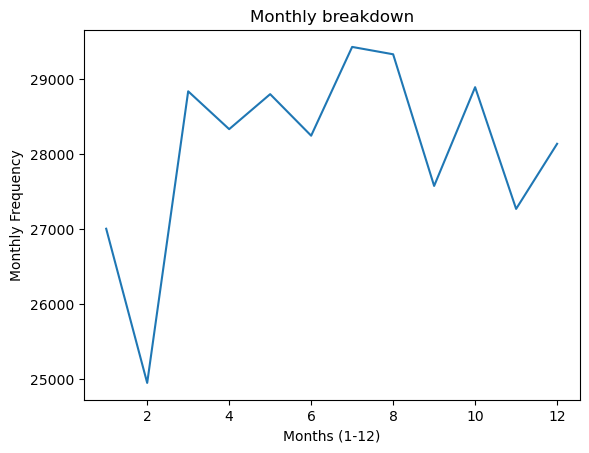

In [19]:
year2013 = flights[flights['year'] == 2013]['month'].value_counts()
fig1 = sns.lineplot(data = year2013)
fig1.set_xlabel('Months (1-12)')
fig1.set_ylabel('Monthly Frequency')
fig1.set_title('Monthly breakdown')
# YOUR CODE HERE
# raise NotImplementedError()

In [20]:
assert fig1.get_title() == 'Monthly breakdown'
assert fig1.get_xlabel() == 'Months (1-12)'
assert fig1.get_ylabel() == 'Monthly Frequency'
assert dict(fig1.lines[0].get_xydata())[6] == 28243

## Question 2.2 (3 pts)
Show the top 5 airports that people flew into using a bar chart. 

Text(0.5, 1.0, 'Top 5 airports that people flew into')

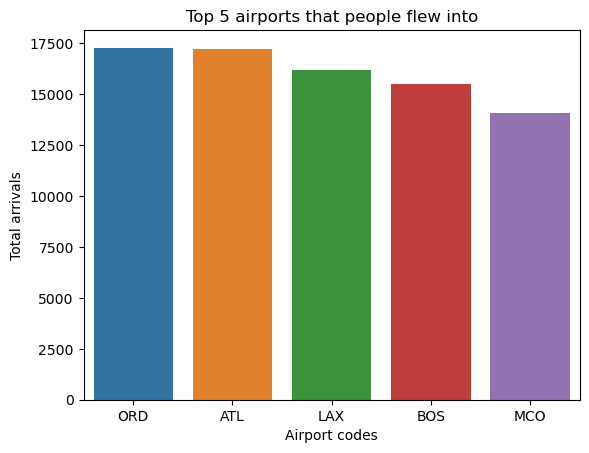

In [21]:
fig_2 = sns.barplot(x=flights['dest'].value_counts()[:5].index,y =flights['dest'].value_counts()[:5].values)
fig_2.set_xlabel('Airport codes')
fig_2.set_ylabel('Total arrivals')
fig_2.set_title('Top 5 airports that people flew into')
# YOUR CODE HERE
# raise NotImplementedError()

In [22]:
x_axis = fig_2.get_xaxis()
text1 = x_axis.get_ticklabels()[0]
assert text1.get_text() == 'ORD'
assert fig_2.get_title() == 'Top 5 airports that people flew into'
assert fig_2.get_xlabel() == 'Airport codes'
assert fig_2.get_ylabel() == 'Total arrivals'

## Question 2.3 (3 pts)

Segment the flights based on time-slots with the following criteria
* flights that depart from 00-5:59am as 'red-eye' flights
* flights that depart from 6am - 11:59am as 'morning'
* flights that depart from 12noon - 3:59pm as 'afternoon'
* flights that depart from 4pm - 11:59pm as 'evening' 

And using seaborn create a plot as shown below. PS: Feel free to choose your color palette.

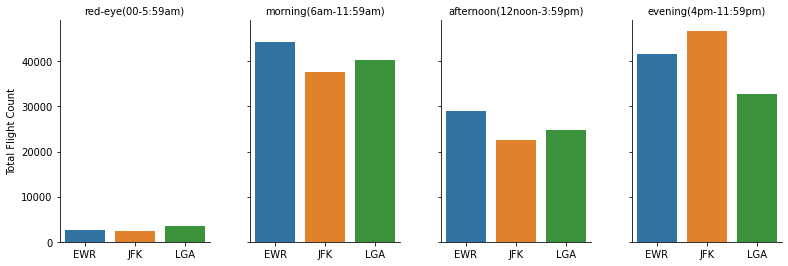

/Users/leoc.wong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


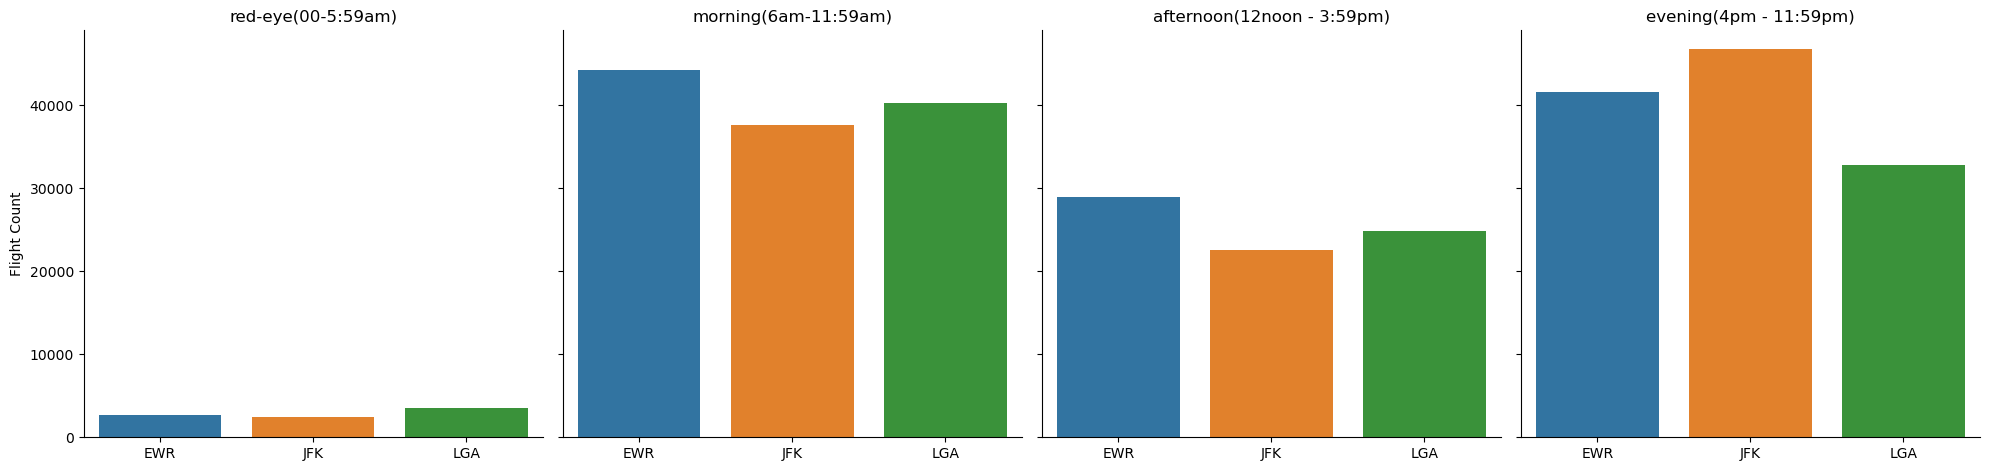

In [23]:
import numpy as np
def time_of_day(x):
    if x >= 0 and x < 600: 
        return 'red-eye'
    elif x >= 600 and x < 1200:
        return 'morning'
    elif x >= 1200 and x < 1600:
        return 'afternoon'
    elif x >= 1600: return 'evening'
    else: return None

flights['time_of_day'] = np.apply_along_axis(time_of_day, axis = 0, arr = flights['dep_time'].values.reshape(1,336776))
parts_of_day_count = flights['time_of_day'].value_counts()
parts_of_day_count

for_fig3 = flights.groupby('origin').filter(lambda x: x.name in ['EWR','JFK','LGA'])[['time_of_day', 'origin']].value_counts()
for_fig3 = for_fig3.reset_index()
for_fig3 = for_fig3[- (for_fig3['time_of_day'] == "None")]

col_order = ['red-eye', 'morning', 'afterno','evening']

fig_3 = sns.catplot(
    data=for_fig3, kind='bar', order= ['EWR','JFK','LGA'],
    col_order =  col_order,
    x='origin', y='count', col='time_of_day').set_axis_labels('','Flight Count')

title_map = {
    'red-eye':'red-eye(00-5:59am)',
    'morning':'morning(6am-11:59am)',
    'afterno':'afternoon(12noon - 3:59pm)',
    'evening':'evening(4pm - 11:59pm)'
}
for ax, key in zip(fig_3.axes.flat, col_order):
    ax.set_title(title_map[key])

# YOUR CODE HERE
# raise NotImplementedError()

In [24]:
assert fig_3.figure.get_axes()[0].get_title() == 'red-eye(00-5:59am)'
assert fig_3.figure.get_axes()[0].get_ylabel() == 'Flight Count'
assert fig_3.figure.get_axes()[1].get_title() == 'morning(6am-11:59am)'